In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # type: ignore

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
whole_data = pd.read_csv(r'Data\Review.csv')
whole_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


In [7]:
data=whole_data[['Score','Text']]
data

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
9995,1,we switched from the advance similac to the or...
9996,5,"Like the bad reviews say, the organic formula ..."
9997,5,I wanted to solely breastfeed but was unable t...
9998,5,i love the fact that i can get this delieved t...


In [8]:
#Identifying misssing values
data.isnull().sum()

Score    0
Text     0
dtype: int64

In [9]:
# Drop rows with any missing values
data = data.dropna()

<Axes: xlabel='Score'>

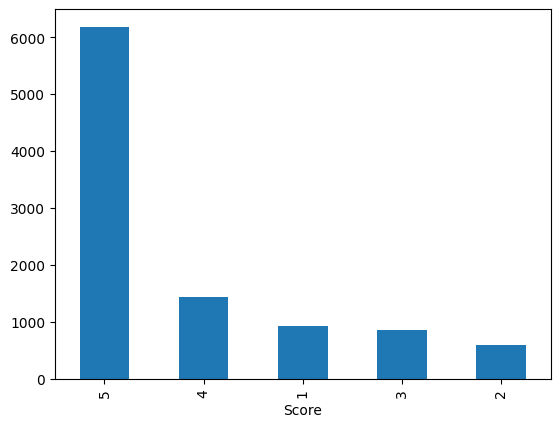

In [10]:
#Plotting the scores (Rating)
data['Score'].value_counts().plot.bar()

DATA PREPROCESSING

Stop Words are common words that are usually filtered out in NLP, because they don't carry significant meaning
example: is, the ...

In [11]:
#Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
#Adding Custom words to remove from the dataset
custom_stopwords={"br","'s","n't"}
stop_words.update(custom_stopwords)
stop_words

{"'s",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 "n't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out'

After doing lemmatization, it may not give us the expected root form of words because the WordNetLemmatizer() in NLTK requires the correct part-of-speech (POS) tag to perform accurate lemmatization.
To improve the lemmatization process, we need to provide correct "POS tags" for each word.

In [11]:
import re
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup

corpus = []

for i in range(len(data)):
    # Remove URLs
    Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', data["Text"][i], flags=re.MULTILINE)

    # Parse HTML using BeautifulSoup
    soup = BeautifulSoup(Cleaned_text, 'html.parser')

    # Get text content without HTML tags
    Cleaned_text = soup.get_text(separator=' ')

    # Remove unwanted characters & numbers
    Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
    Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)

    # Replace extra spaces and angle brackets left by BeautifulSoup
    Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
    
    #Changing to lowercase
    Cleaned_text = Cleaned_text.lower()

    #word_tokenize interface for tokenization
    Cleaned_text = word_tokenize(Cleaned_text)
    
    # POS tagging
    pos_tags = pos_tag(Cleaned_text)
    
    # Lemmatize with POS tags
    Cleaned_text = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags if word not in stop_words]
    
    # Join the words back into a single string
    Cleaned_text = " ".join(Cleaned_text)
    corpus.append(Cleaned_text)

data['Cleaned_Text'] = corpus
print(data['Cleaned_Text'])

0       buy several vitality can dog food product find...
1       product arrive label jumbo salt peanut peanut ...
2       confection around century light pillowy citrus...
3       look secret ingredient robitussin believe find...
4       great taffy great price wide assortment yummy ...
                              ...                        
9995    switch advance similac organic product think w...
9996    like bad review say organic formula constipate...
9997    want solely breastfeed unable keep supplement ...
9998    love fact get delieved house delievy charge ha...
9999    week old gas constipation problem first week t...
Name: Cleaned_Text, Length: 10000, dtype: object


In [17]:
data['Text'][25]

'Product received is as advertised.<br /><br /><a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

In [18]:
data['Cleaned_Text'][25]

'product receive advertised'

In [19]:
#Finding the count of each word
temp_data = pd.Series(' '.join(data['Cleaned_Text']).split()).value_counts()
temp_data

like         4833
taste        4466
good         4352
coffee       3914
flavor       3866
             ... 
wisdom          1
remake          1
vainly          1
performer       1
amazn           1
Name: count, Length: 14666, dtype: int64

In [20]:
#Filering out the words with count <=1
drops = temp_data[temp_data <= 1]
drops

nutrisodas     1
unavoidably    1
mdr            1
oounces        1
manages        1
              ..
wisdom         1
remake         1
vainly         1
performer      1
amazn          1
Name: count, Length: 6194, dtype: int64

In [21]:
#Removing the words with count<=1
data['Cleaned_Text'] = data['Cleaned_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
data['Cleaned_Text']

0       buy several vitality can dog food product find...
1       product arrive label jumbo salt peanut peanut ...
2       confection around century light citrus gelatin...
3       look secret ingredient robitussin believe find...
4       great taffy great price wide assortment yummy ...
                              ...                        
9995    switch advance similac organic product think w...
9996    like bad review say organic formula constipate...
9997    want solely breastfeed unable keep supplement ...
9998         love fact get house charge hard find organic
9999    week old gas constipation problem first week t...
Name: Cleaned_Text, Length: 10000, dtype: object

# VADER

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
data['Cleaned_Text'].head(10)

0    buy several vitality can dog food product find...
1    product arrive label jumbo salt peanut peanut ...
2    confection around century light citrus gelatin...
3    look secret ingredient robitussin believe find...
4    great taffy great price wide assortment yummy ...
5    get wild hair taffy order five pound bag taffy...
6    taffy great flavor soft chewy candy individual...
7    taffy good soft chewy flavor amaze would defin...
8    right mostly sprout cat eat grass love rotate ...
9    healthy dog food good digestion also good smal...
Name: Cleaned_Text, dtype: object

The SentimentIntensityAnalyzer from NLTK's VADER module is a useful tool for performing sentiment analysis. We use the SentimentIntensityAnalyzer to get sentiment scores for individual sentences or larger pieces of text. The polarity_scores method returns a dictionary with the following keys: neg: Negative sentiment score (range from 0 to 1). neu: Neutral sentiment score (range from 0 to 1). pos: Positive sentiment score (range from 0 to 1). compound: A compound score that combines the three sentiment scores into a single value, ranging from -1 (most negative) to +1 (most positive).

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [25]:
#applying vader in our dataset
data["Cleaned_Text"][0:10].apply(lambda x: sa.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'comp...
1    {'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...
2    {'neg': 0.143, 'neu': 0.542, 'pos': 0.315, 'co...
3    {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...
4    {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...
5    {'neg': 0.043, 'neu': 0.665, 'pos': 0.292, 'co...
6    {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'comp...
7    {'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp...
8    {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...
9    {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...
Name: Cleaned_Text, dtype: object

In [26]:
data["Cleaned_Text"][0:10].apply(lambda x: sa.polarity_scores(x)["compound"])

0    0.9246
1   -0.1027
2    0.8624
3    0.4404
4    0.9468
5    0.9136
6    0.9422
7    0.9274
8    0.6369
9    0.8176
Name: Cleaned_Text, dtype: float64

In [27]:
data["polarity_score"] = data["Cleaned_Text"].apply(lambda x: sa.polarity_scores(x)["compound"])
data

,Score,Text,Cleaned_Text,polarity_score
0,5,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...,0.9246
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanut peanut ...,-0.1027
2,4,This is a confection that has been around a fe...,confection around century light citrus gelatin...,0.8624
3,2,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...,0.4404
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468
...,...,...,...,...
9995,1,we switched from the advance similac to the or...,switch advance similac organic product think w...,-0.6705
9996,5,"Like the bad reviews say, the organic formula ...",like bad review say organic formula constipate...,0.8442
9997,5,I wanted to solely breastfeed but was unable t...,want solely breastfeed unable keep supplement ...,0.9403
9998,5,i love the fact that i can get this delieved t...,love fact get house charge hard find organic,0.5859


In [57]:
#Rule for determining the Sentiment
data['Sentiments']=data["Cleaned_Text"].apply(lambda x: 'positive' if sa.polarity_scores(x)["compound"] >= 0.5  else 'negative' if sa.polarity_scores(x)["compound"] <= -0.5  else 'neutral')
data.head(30)

,Score,Text,Cleaned_Text,polarity_score,Sentiment,Sentiments
0,5,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...,0.9246,2,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanut peanut ...,-0.1027,1,neutral
2,4,This is a confection that has been around a fe...,confection around century light citrus gelatin...,0.8624,2,positive
3,2,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...,0.4404,1,neutral
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468,2,positive
5,4,I got a wild hair for taffy and ordered this f...,get wild hair taffy order five pound bag taffy...,0.9136,2,positive
6,5,This saltwater taffy had great flavors and was...,taffy great flavor soft chewy candy individual...,0.9422,2,positive
7,5,This taffy is so good. It is very soft and ch...,taffy good soft chewy flavor amaze would defin...,0.9274,2,positive
8,5,Right now I'm mostly just sprouting this so my...,right mostly sprout cat eat grass love rotate ...,0.6369,2,positive
9,5,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...,0.8176,2,positive


In [58]:
#To find the number of Positive, negative, and neutal reviews
data["Sentiments"].value_counts()

Sentiments
positive    8291
neutral     1441
negative     268
Name: count, dtype: int64

The LabelEncoder from Scikit-learn to convert the sentiment scores into numerical labels. The LabelEncoder will find all unique values in the data["Sentiment"] column. It will assign a unique integer to each unique sentiment score. The sentiment scores is replaced by these integer labels [0,1,2]. 

LabelEncoder() initializes a new instance of the LabelEncoder class. ".fit_transform(data["Sentiment"])" performs two actions: 1.fit: Learns the unique values in data["Sentiment"]. 2.transform: Converts these unique values into numerical labels.

In [59]:
# The sentiment value (which were previously categorical label from the VADER analysis) is replaced by integer labels [0,1,2]
from sklearn.preprocessing import LabelEncoder
data["Sentiment"] = LabelEncoder().fit_transform(data["Sentiments"])
data.head(20)

,Score,Text,Cleaned_Text,polarity_score,Sentiment,Sentiments
0,5,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...,0.9246,2,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanut peanut ...,-0.1027,1,neutral
2,4,This is a confection that has been around a fe...,confection around century light citrus gelatin...,0.8624,2,positive
3,2,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...,0.4404,1,neutral
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468,2,positive
5,4,I got a wild hair for taffy and ordered this f...,get wild hair taffy order five pound bag taffy...,0.9136,2,positive
6,5,This saltwater taffy had great flavors and was...,taffy great flavor soft chewy candy individual...,0.9422,2,positive
7,5,This taffy is so good. It is very soft and ch...,taffy good soft chewy flavor amaze would defin...,0.9274,2,positive
8,5,Right now I'm mostly just sprouting this so my...,right mostly sprout cat eat grass love rotate ...,0.6369,2,positive
9,5,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...,0.8176,2,positive


In [31]:
data["Sentiment"].value_counts()

Sentiment
2    8291
1    1441
0     268
Name: count, dtype: int64

WordCloud

In [32]:
!pip install wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
# Seperating Positive, Negative and Neutral Sentiment
positive_texts = ' '.join(data[data['Sentiment'] == 2]['Cleaned_Text'])
neutral_texts = ' '.join(data[data['Sentiment'] == 1]['Cleaned_Text'])
negative_texts = ' '.join(data[data['Sentiment'] == 0]['Cleaned_Text'])

In [35]:
print(f'Positive texts length: {len(positive_texts)}')
print(f'Neutral texts length: {len(neutral_texts)}')
print(f'Negative texts length: {len(negative_texts)}')

Positive texts length: 2014813
Neutral texts length: 220929
Negative texts length: 68648


In [36]:
# Generating word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)


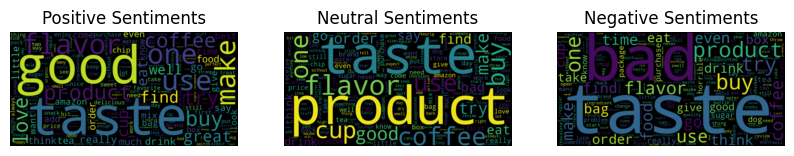

In [37]:
# Display the word clouds
wordcloud_fig=plt.figure(figsize=(10, 10))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiments')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

plt.show()

wordcloud_fig.savefig("wordcloud2.png")

In [61]:
#Assigning X values
X = data["Cleaned_Text"] # independent variable

In [62]:
#Assigning Y values
Y= data["Sentiments"] #dependent Variable

DATA Splitting

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# TF-IDF

TF-IDF is similar to "CountVectorizer()" but instead of just counting the occurence of words in each document, it calculates the term frequency- inverse document frequency (TF-IDF) value of each value.

* Term Frequency (TF):- It measures how frequently a term(word) appears in a document
TF = (Number of times term t appears in a document) / (Total number of terms in the document)

* Inverse Document Frequency (IDF):- Measures how important a term is across the entire corpus.
IDF = log_e(Total number of documents / Number of documents with term t in it)

* TF-IDF:- It is the product of TF and IDF, giving a higher weight to terms that are rare in the entire corpus but frequent in specific documents.
TF-IDF = TF * IDF



In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

# Fit and transform the document
#X_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_train_tfidf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tfidf = tf_idf_vectorizer.transform(X_test)

In [65]:
print("TF-IDF Feature Names:")
tf_idf_vectorizer.get_feature_names_out()[1:50]

TF-IDF Feature Names:


array(['aaaa', 'abbott', 'ability', 'able', 'absence', 'absent',
       'absolute', 'absolutely', 'absolutley', 'absolutly', 'absorb',
       'absorbtion', 'abundant', 'abuse', 'acacia', 'academia', 'academy',
       'acai', 'accent', 'accept', 'acceptable', 'access', 'accessible',
       'accessory', 'accident', 'accidentally', 'accidently',
       'accommodate', 'accompaniment', 'accompany', 'accomplish',
       'accord', 'accordingly', 'account', 'accoutrement', 'accumulate',
       'accuracy', 'accurate', 'accustom', 'ace', 'acerola', 'acetate',
       'ache', 'achieve', 'acid', 'acidic', 'acidity', 'acknowledge',
       'acme'], dtype=object)

In [66]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
# Print the TF-IDF matrix for debugging
print("TF-IDF Matrix Shape:")
print(X_train_tfidf.shape)

TF-IDF Matrix Shape:
(8000, 8292)


In [68]:
# Perform scaling on TF-IDF data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Now X_train_scaled and X_test_scaled can be used for model training and testing
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (8000, 8292)
X_test_scaled shape: (2000, 8292)


N-Gram Frequency

In [69]:
tf_idf_vectorizer_2 = TfidfVectorizer(ngram_range=(2,2), max_df=0.85, min_df=2, stop_words='english')
X_train_tfidf_ngram = tf_idf_vectorizer_2.fit_transform(X_train)
X_test_tfidf_ngram = tf_idf_vectorizer_2.fit_transform(X_test)
tf_idf_vectorizer_2.get_feature_names_out()[1:50]

array(['able fee', 'able finish', 'able make', 'able sample', 'able try',
       'able use', 'absolute best', 'absolute favorite',
       'absolutely adore', 'absolutely delicious', 'absolutely great',
       'absolutely love', 'accord company', 'acerola juice',
       'acid subdue', 'acid vitamin', 'acidic taste', 'acquire taste',
       'act like', 'actual coffee', 'actual product', 'actually day',
       'actually drink', 'actually good', 'actually like',
       'actually look', 'actually make', 'actually pretty',
       'actually quite', 'actually taste', 'add additional', 'add bit',
       'add chia', 'add chicken', 'add coffee', 'add corn', 'add couple',
       'add cup', 'add dash', 'add dry', 'add extra', 'add fact',
       'add favorite', 'add flavor', 'add great', 'add ingredient',
       'add juice', 'add little', 'add lot'], dtype=object)

In [70]:
print("X_train_tfidf_ngramshape:", X_train_tfidf_ngram.shape)
print("X_test_tfidf_ngram shape:", X_test_tfidf_ngram.shape)

X_train_tfidf_ngramshape: (8000, 30153)
X_test_tfidf_ngram shape: (2000, 6103)


In [71]:
X_train_tfidf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Count Vectorizer

CountVectorizer from Scikit-learn is used to convert a collection of text documents into a matrix of token counts. This is a common preprocessing step in natural language processing (NLP) and text mining tasks. It creates a bag-of-words representation, where each text document is represented by the frequency (or count) of each word that appears in the document. This model does not consider word order but focuses on the presence or absence of words. Each unique word in the corpus becomes a feature (a column in the matrix), and each document is represented as a vector where the value of each feature is the count of that word in the document.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [73]:
vectorizer.get_feature_names_out()[1:50]

array(['aaaa', 'abbott', 'ability', 'able', 'absence', 'absent',
       'absolute', 'absolutely', 'absolutley', 'absolutly', 'absorb',
       'absorbtion', 'abundant', 'abuse', 'acacia', 'academia', 'academy',
       'acai', 'accent', 'accept', 'acceptable', 'access', 'accessible',
       'accessory', 'accident', 'accidentally', 'accidently',
       'accommodate', 'accompaniment', 'accompany', 'accomplish',
       'accord', 'accordingly', 'account', 'accoutrement', 'accumulate',
       'accuracy', 'accurate', 'accustom', 'ace', 'acerola', 'acetate',
       'ache', 'achieve', 'acid', 'acidic', 'acidity', 'acknowledge',
       'acme'], dtype=object)

In [74]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
# Perform scaling on Count vectorized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled_cv = scaler.fit_transform(X_train_cv)
X_test_scaled_cv = scaler.transform(X_test_cv)

# Now X_train_scaled and X_test_scaled can be used for model training and testing
print("X_train_scaled shape:", X_train_scaled_cv.shape)
print("X_test_scaled shape:", X_test_scaled_cv.shape)

X_train_scaled shape: (8000, 8292)
X_test_scaled shape: (2000, 8292)


# Sentiment Analysis Modeling

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [52]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import uniform
from skopt.space import Real, Categorical, Integer

# Support Vector Classifier - SVC

In [55]:
from sklearn.svm import SVC

In [56]:
# TF-IDF Word-Level
svc_tf_model = SVC(kernel='poly', C=10).fit(X_train_tfidf, y_train)
cross_val_score(svc_tf_model, X_train_tfidf, y_train, cv=5, n_jobs=-1).mean()

0.846125

Grid Search - SVC

In [57]:
# Define the model and parameter grid for tuning
svc_grid = SVC()
param_svc_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
    }


# Perform GridSearchCV with cross-validation
grid_search_svc = GridSearchCV(estimator=svc_grid, param_grid=param_svc_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_svc_grid = grid_search_svc.best_estimator_
best_svc_grid.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_svc_grid = scaler.transform(X_test_scaled)
y_pred_svc_grid = best_svc_grid.predict(X_test_scaled_svc_grid)

#Calculate the accuracy
acc_svc_grid=accuracy_score(y_test,y_pred_svc_grid)
print(f'Accuracy: {acc_svc_grid:.2f}')

# Calculate performance metrics
mse_svc_grid = mean_squared_error(y_test, y_pred_svc_grid)
print(f'Mean Squared Error on Test Set: {mse_svc_grid:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_search_svc.best_params_}')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.27
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [58]:
print(classification_report(y_test, y_pred_svc_grid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.67      0.82      0.74      2000



 Grid Search - SVC with Count Vectorizer

In [59]:
# Define the model and parameter grid for tuning
svc_grid_cv = SVC()
param_svc_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
    }


# Perform GridSearchCV with cross-validation
grid_search_svc_cv = GridSearchCV(estimator=svc_grid_cv, param_grid=param_svc_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_svc_cv.fit(X_train_scaled_cv, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_svc_grid_cv = grid_search_svc_cv.best_estimator_
best_svc_grid_cv.fit(X_train_scaled_cv, y_train)

#Evaluate the final model on the test set
X_test_scaled_svc_grid_cv = scaler.transform(X_test_scaled_cv)
y_pred_svc_grid_cv = best_svc_grid_cv.predict(X_test_scaled_svc_grid_cv)

#Calculate the accuracy
acc_svc_grid_cv=accuracy_score(y_test,y_pred_svc_grid_cv)
print(f'Accuracy: {acc_svc_grid_cv:.2f}')

# Calculate performance metrics
mse_svc_grid_cv = mean_squared_error(y_test, y_pred_svc_grid_cv)
print(f'Mean Squared Error on Test Set: {mse_svc_grid_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_search_svc_cv.best_params_}')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.26
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [60]:
print(classification_report(y_test, y_pred_svc_grid_cv))

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        57
           1       0.40      0.01      0.01       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.52      0.34      0.32      2000
weighted avg       0.74      0.82      0.74      2000



Random Search - SVC

In [61]:
# Define the model and parameter grid for tuning
svc_rand = SVC()
param_svc_rand = {
    'C': np.logspace(-3, 2, 6),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV with cross-validation
random_search_svc = RandomizedSearchCV(estimator=svc_rand, param_distributions=param_svc_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_svc.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc = random_search_svc.best_estimator_
best_svc.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_rand = scaler.transform(X_test_scaled)
y_pred_svc_rand = best_svc.predict(X_test_scaled_svc_rand)

# Calculate the accuracy
acc_svc_rand = accuracy_score(y_test, y_pred_svc_rand)
print(f'Accuracy: {acc_svc_rand:.2f}')

# Calculate performance metrics
mse_svc_rand = mean_squared_error(y_test, y_pred_svc_rand)
print(f'Mean Squared Error on Test Set: {mse_svc_rand:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_svc.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.57
Mean Squared Error on Test Set: 0.83
Best Parameters: {'kernel': 'poly', 'gamma': 'auto', 'C': 100.0}


In [62]:
print(classification_report(y_test, y_pred_svc_rand))

              precision    recall  f1-score   support

           0       0.07      0.40      0.12        57
           1       0.20      0.32      0.25       308
           2       0.86      0.62      0.72      1635

    accuracy                           0.57      2000
   macro avg       0.38      0.45      0.36      2000
weighted avg       0.74      0.57      0.63      2000



Random Search - SVC with Count Vectorizer

In [63]:
# Define the model and parameter grid for tuning
svc_rand_cv = SVC()
param_svc_rand = {
    'C': np.logspace(-3, 2, 6),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV with cross-validation
random_search_svc_cv = RandomizedSearchCV(estimator=svc_rand_cv, param_distributions=param_svc_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_svc_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc_rand_cv = random_search_svc.best_estimator_
best_svc_rand_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_rand_cv = scaler.transform(X_test_scaled_cv)
y_pred_svc_rand_cv = best_svc_rand_cv.predict(X_test_scaled_svc_rand_cv)

# Calculate the accuracy
acc_svc_rand_cv = accuracy_score(y_test, y_pred_svc_rand_cv)
print(f'Accuracy: {acc_svc_rand_cv:.2f}')

# Calculate performance metrics
mse_svc_rand_cv = mean_squared_error(y_test, y_pred_svc_rand_cv)
print(f'Mean Squared Error on Test Set: {mse_svc_rand_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_svc_cv.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.44
Mean Squared Error on Test Set: 1.26
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 10.0}


In [64]:
print(classification_report(y_test, y_pred_svc_grid_cv))

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        57
           1       0.40      0.01      0.01       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.52      0.34      0.32      2000
weighted avg       0.74      0.82      0.74      2000



Bayesian Optimization - SVC

In [65]:
# Define the model and parameter search space for Bayesian Optimization
svc_bayes = SVC()
param_svc_bayes = {
    'C': Real(1e-3, 1e2, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'gamma': Categorical(['scale', 'auto'])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_svc = BayesSearchCV(estimator=svc_bayes, search_spaces=param_svc_bayes, n_iter=32, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
bayes_search_svc.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc_bayes = bayes_search_svc.best_estimator_
best_svc_bayes.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_bayes = scaler.transform(X_test_scaled)
y_pred_svc_bayes = best_svc_bayes.predict(X_test_scaled_svc_bayes)

# Calculate the accuracy
acc_svc_bayes = accuracy_score(y_test, y_pred_svc_bayes)
print(f'Accuracy: {acc_svc_bayes:.2f}')

# Calculate performance metrics
mse_svc_bayes = mean_squared_error(y_test, y_pred_svc_bayes)
print(f'Mean Squared Error on Test Set: {mse_svc_bayes:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_svc.best_params_}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [66]:
print(classification_report(y_test, y_pred_svc_bayes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.67      0.82      0.74      2000



Bayesian Optimization - SVC with Count Vectorizer

In [68]:
# Define the model and parameter search space for Bayesian Optimization
svc_bayes_cv = SVC()
param_svc_bayes = {
    'C': Real(1e-3, 1e2, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'gamma': Categorical(['scale', 'auto'])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_svc_cv = BayesSearchCV(estimator=svc_bayes_cv, search_spaces=param_svc_bayes, n_iter=32, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
bayes_search_svc_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc_bayes_cv = bayes_search_svc_cv.best_estimator_
best_svc_bayes_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_bayes_cv = scaler.transform(X_test_scaled_cv)
y_pred_svc_bayes_cv = best_svc_bayes_cv.predict(X_test_scaled_svc_bayes_cv)

# Calculate the accuracy
acc_svc_bayes_cv = accuracy_score(y_test, y_pred_svc_bayes_cv)
print(f'Accuracy: {acc_svc_bayes_cv:.2f}')

# Calculate performance metrics
mse_svc_bayes_cv = mean_squared_error(y_test, y_pred_svc_bayes_cv)
print(f'Mean Squared Error on Test Set: {mse_svc_bayes_cv:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_svc_cv.best_params_}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [70]:
print(classification_report(y_test, y_pred_svc_bayes_cv))

              precision    recall  f1-score   support

           0       0.25      0.02      0.03        57
           1       0.45      0.02      0.03       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.51      0.34      0.32      2000
weighted avg       0.75      0.82      0.74      2000



Best Model - SVC

In [73]:
# Best Model for SVM
svc_best_model = SVC(kernel='poly', gamma='scale', C=10).fit(X_train_tfidf, y_train)
#svc_best_model = SVC(kernel='poly', C=100, gamma='auto').fit(X_train_tfidf, y_train)
cross_val_score(svc_best_model, X_train_tfidf, y_train, cv=3, n_jobs=-1).mean()

0.8423747294153873

In [74]:
X_test_svc = scaler.transform(X_test_scaled)
y_pred_best_svc = svc_best_model.predict(X_test_svc)
#y_pred_best_svc = svc_best_model.predict(X_test_scaled)

# Calculate the accuracy
acc_best_svc = accuracy_score(y_test, y_pred_best_svc)
print(f'Accuracy: {acc_best_svc:.2f}')

print(classification_report(y_test, y_pred_best_svc))


Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.07      0.33      0.11        57
           1       0.20      0.31      0.24       308
           2       0.85      0.64      0.73      1635

    accuracy                           0.58      2000
   macro avg       0.37      0.43      0.36      2000
weighted avg       0.73      0.58      0.64      2000



Best Model for SVM with CV

In [75]:
# Best Model for SVM with CV
svc_best_model_cv = SVC(kernel='rbf', C=24.142039595673978, gamma='auto').fit(X_train_cv, y_train)
cross_val_score(svc_best_model_cv, X_train_cv, y_train, cv=3, n_jobs=-1).mean()

0.8321249791262963

In [76]:
X_test_svc_cv = scaler.transform(X_test_scaled_cv)
y_pred_best_svc_cv = svc_best_model_cv.predict(X_test_svc_cv)

# Calculate the accuracy
acc_best_svc_cv = accuracy_score(y_test, y_pred_best_svc_cv)
print(f'Accuracy: {acc_best_svc_cv:.2f}')

print(classification_report(y_test, y_pred_best_svc_cv))


Accuracy: 0.07
              precision    recall  f1-score   support

           0       0.03      1.00      0.06        57
           1       0.00      0.00      0.00       308
           2       0.89      0.05      0.09      1635

    accuracy                           0.07      2000
   macro avg       0.31      0.35      0.05      2000
weighted avg       0.73      0.07      0.08      2000



# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

Hyper Parameter Optimization - Random Forest

Grid Search - Random Forest

In [78]:
# Define the model and parameter grid for tuning
rf_grid = RandomForestClassifier()
params_rf_grid = {"max_depth": [8, None],
                  "max_features": [7, "auto"],
                  "min_samples_split": [2, 5, 8],
                  "n_estimators": [100, 200,300]
                                            }


# Perform GridSearchCV with cross-validation
grid_rf = GridSearchCV(rf_grid, params_rf_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_rf_grid =grid_rf.best_estimator_
best_rf_grid.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_rf_grid = scaler.transform(X_test_scaled)
y_pred_rf_grid = best_rf_grid.predict(X_test_scaled_rf_grid)

#Calculate the accuracy
acc_rf_grid=accuracy_score(y_test,y_pred_rf_grid)
print(f'Accuracy: {acc_rf_grid:.2f}')

# Calculate performance metrics
mse_rf_grid = mean_squared_error(y_test, y_pred_rf_grid)
print(f'Mean Squared Error on Test Set: {mse_rf_grid:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_rf.best_params_}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Accuracy: 0.83
Mean Squared Error on Test Set: 0.22
Best Parameters: {'max_depth': None, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
print(classification_report(y_test, y_pred_rf_grid))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        57
           1       0.59      0.16      0.25       308
           2       0.84      0.99      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.81      0.40      0.43      2000
weighted avg       0.81      0.83      0.79      2000



Grid Search - Random Forest with Count Vectorizer

In [80]:
# Define the model and parameter grid for tuning
rf_grid_cv = RandomForestClassifier()
params_rf_grid = {"max_depth": [8, None],
                  "max_features": [7, "auto"],
                  "min_samples_split": [2, 5, 8],
                  "n_estimators": [100, 200,300]
                                            }


# Perform GridSearchCV with cross-validation
grid_rf_cv = GridSearchCV(rf_grid_cv, params_rf_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf_cv.fit(X_train_scaled_cv, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_rf_grid_cv =grid_rf.best_estimator_
best_rf_grid_cv.fit(X_train_scaled_cv, y_train)

#Evaluate the final model on the test set
X_test_scaled_rf_grid_cv = scaler.transform(X_test_scaled_cv)
y_pred_rf_grid_cv = best_rf_grid_cv.predict(X_test_scaled_rf_grid_cv)

#Calculate the accuracy
acc_rf_grid_cv=accuracy_score(y_test,y_pred_rf_grid_cv)
print(f'Accuracy: {acc_rf_grid_cv:.2f}')

# Calculate performance metrics
mse_rf_grid_cv = mean_squared_error(y_test, y_pred_rf_grid_cv)
print(f'Mean Squared Error on Test Set: {mse_rf_grid_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_rf_cv.best_params_}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Accuracy: 0.83
Mean Squared Error on Test Set: 0.25
Best Parameters: {'max_depth': None, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
print(classification_report(y_test, y_pred_rf_grid_cv))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        57
           1       0.90      0.06      0.11       308
           2       0.83      1.00      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.91      0.38      0.38      2000
weighted avg       0.84      0.83      0.76      2000



Random Search - Random Forest

In [83]:
# Define the model and parameter grid for tuning
rf_rand = RandomForestClassifier()
param_rf_rand = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_rand, param_distributions=param_rf_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_rand = random_search_rf.best_estimator_
best_rf_rand.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_rand = scaler.transform(X_test_scaled)
y_pred_rf_rand = best_rf_rand.predict(X_test_scaled_rf_rand)

# Calculate the accuracy
acc_rf_rand = accuracy_score(y_test, y_pred_rf_rand)
print(f'Accuracy: {acc_rf_rand:.2f}')

# Calculate performance metrics
mse_rf_rand = mean_squared_error(y_test, y_pred_rf_rand)
print(f'Mean Squared Error on Test Set: {mse_rf_rand:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_rf.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.26
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [84]:
print(classification_report(y_test, y_pred_rf_rand))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.46      0.02      0.04       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.43      0.34      0.31      2000
weighted avg       0.74      0.82      0.74      2000



Random Search - Random Forest with Count Vectorizer

In [85]:
# Define the model and parameter grid for tuning
rf_rand_cv = RandomForestClassifier()
param_rf_rand = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_rf_cv = RandomizedSearchCV(estimator=rf_rand_cv, param_distributions=param_rf_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_rf_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_rand_cv = random_search_rf_cv.best_estimator_
best_rf_rand_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_rand_cv = scaler.transform(X_test_scaled_cv)
y_pred_rf_rand_cv = best_rf_rand_cv.predict(X_test_scaled_rf_rand_cv)

# Calculate the accuracy
acc_rf_rand_cv = accuracy_score(y_test, y_pred_rf_rand_cv)
print(f'Accuracy: {acc_rf_rand_cv:.2f}')

# Calculate performance metrics
mse_rf_rand_cv = mean_squared_error(y_test, y_pred_rf_rand_cv)
print(f'Mean Squared Error on Test Set: {mse_rf_rand_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_rf_cv.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.27
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}


In [86]:
print(classification_report(y_test, y_pred_rf_rand_cv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.67      0.82      0.74      2000



Bayesian Optimization - Random Forest

In [87]:
# Define the model and parameter search space for Bayesian Optimization
rf_bayes = RandomForestClassifier()
param_rf_bayes = {
    'n_estimators': Integer(100, 500),
    'max_features': Categorical(['sqrt', 'log2']),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'bootstrap': Categorical([True, False])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_rf = BayesSearchCV(estimator=rf_bayes, search_spaces=param_rf_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_rf.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_bayes = bayes_search_rf.best_estimator_
best_rf_bayes.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_bayes = scaler.transform(X_test_scaled)
y_pred_rf_bayes = best_rf_bayes.predict(X_test_scaled_rf_bayes)

# Calculate the accuracy
acc_rf_bayes = accuracy_score(y_test, y_pred_rf_bayes)
print(f'Accuracy: {acc_rf_bayes:.2f}')

# Calculate performance metrics
mse_rf_bayes = mean_squared_error(y_test, y_pred_rf_bayes)
print(f'Mean Squared Error on Test Set: {mse_rf_bayes:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_rf.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [88]:
print(classification_report(y_test, y_pred_rf_bayes))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16        57
           1       0.41      0.10      0.16       308
           2       0.84      0.98      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.75      0.39      0.41      2000
weighted avg       0.78      0.82      0.77      2000



Bayesian Optimization - Random Forest with Count Vectorizer

In [89]:
# Define the model and parameter search space for Bayesian Optimization
rf_bayes_cv = RandomForestClassifier()
param_rf_bayes = {
    'n_estimators': Integer(100, 500),
    'max_features': Categorical(['sqrt', 'log2']),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'bootstrap': Categorical([True, False])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_rf_cv = BayesSearchCV(estimator=rf_bayes_cv, search_spaces=param_rf_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_rf_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_bayes_cv = bayes_search_rf_cv.best_estimator_
best_rf_bayes_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_bayes_cv = scaler.transform(X_test_scaled_cv)
y_pred_rf_bayes_cv = best_rf_bayes_cv.predict(X_test_scaled_rf_bayes_cv)

# Calculate the accuracy
acc_rf_bayes_cv = accuracy_score(y_test, y_pred_rf_bayes_cv)
print(f'Accuracy: {acc_rf_bayes_cv:.2f}')

# Calculate performance metrics
mse_rf_bayes_cv = mean_squared_error(y_test, y_pred_rf_bayes_cv)
print(f'Mean Squared Error on Test Set: {mse_rf_bayes_cv:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_rf_cv.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [90]:
print(classification_report(y_test, y_pred_rf_bayes_cv))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        57
           1       0.82      0.03      0.06       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.88      0.37      0.36      2000
weighted avg       0.83      0.82      0.75      2000



Best Model - Random Forest

In [60]:
# Best Model for Random Forest
rf_best_model = RandomForestClassifier(max_depth= None, max_features= 7, min_samples_split= 2, n_estimators=100).fit(X_train_tfidf, y_train)
cross_val_score(rf_best_model, X_train_tfidf, y_train, cv=5, n_jobs=-1).mean()

NameError: name 'X_train_tfidf' is not defined

In [92]:
X_test_rf = scaler.transform(X_test_scaled)
y_pred_best_rf= rf_best_model.predict(X_test_rf)

# Calculate the accuracy
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Accuracy: {acc_best_rf:.2f}')

print(classification_report(y_test, y_pred_best_rf))


Accuracy: 0.83
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        57
           1       0.52      0.15      0.24       308
           2       0.84      0.98      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.79      0.40      0.41      2000
weighted avg       0.80      0.83      0.78      2000



Best Model - Random Forest with Count Vectorizer

In [61]:
# Best Model for Random Forest
rf_best_model_cv = RandomForestClassifier(max_depth= None, max_features= 7, min_samples_split= 2, n_estimators=100).fit(X_train_cv, y_train)
cross_val_score(rf_best_model_cv, X_train_cv, y_train, cv=5, n_jobs=-1).mean()

0.8472500000000001

In [62]:
X_test_rf_cv = scaler.transform(X_test_scaled_cv)
y_pred_best_rf_cv= rf_best_model_cv.predict(X_test_rf_cv)

# Calculate the accuracy
acc_best_rf_cv = accuracy_score(y_test, y_pred_best_rf_cv)
print(f'Accuracy: {acc_best_rf_cv:.2f}')

print(classification_report(y_test, y_pred_best_rf_cv))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        57
           1       0.83      0.06      0.11       308
           2       0.83      1.00      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.89      0.38      0.39      2000
weighted avg       0.83      0.83      0.76      2000



# Naive Bayes

In [98]:
from sklearn.naive_bayes import MultinomialNB

Hyper Parameter Optimization - Naive Bayes

Grid Search - Naive Bayes

In [99]:
# Define the model and parameter grid for tuning
nb_grid = MultinomialNB()

param_nb_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
    }


# Perform GridSearchCV with cross-validation
nb_grid = GridSearchCV(nb_grid, param_grid=param_nb_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
nb_grid.fit(X_train_scaled, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_nb_grid = nb_grid.best_estimator_
best_nb_grid.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_nb_grid = scaler.transform(X_test_scaled)
y_pred_nb_grid = best_nb_grid.predict(X_test_scaled_nb_grid)

#Calculate the accuracy
acc_nb_grid=accuracy_score(y_test,y_pred_nb_grid)
print(f'Accuracy: {acc_nb_grid:.2f}')

# Calculate performance metrics
mse_nb_grid = mean_squared_error(y_test, y_pred_nb_grid)
print(f'Mean Squared Error on Test Set: {mse_nb_grid:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {nb_grid.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'alpha': 0.1, 'fit_prior': True}


In [100]:
print(classification_report(y_test, y_pred_nb_grid))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.28      0.26       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Grid Search - Naive Bayes with Count Vectorizer

In [101]:
# Define the model and parameter grid for tuning
nb_grid_cv = MultinomialNB()

param_nb_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
    }


# Perform GridSearchCV with cross-validation
nb_grid_cv = GridSearchCV(nb_grid_cv, param_grid=param_nb_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
nb_grid_cv.fit(X_train_scaled_cv, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_nb_grid_cv = nb_grid_cv.best_estimator_
best_nb_grid_cv.fit(X_train_scaled_cv, y_train)

#Evaluate the final model on the test set
X_test_scaled_nb_grid_cv = scaler.transform(X_test_scaled_cv)
y_pred_nb_grid_cv = best_nb_grid_cv.predict(X_test_scaled_nb_grid_cv)

#Calculate the accuracy
acc_nb_grid_cv =accuracy_score(y_test,y_pred_nb_grid_cv)
print(f'Accuracy: {acc_nb_grid_cv:.2f}')

# Calculate performance metrics
mse_nb_grid_cv = mean_squared_error(y_test, y_pred_nb_grid_cv)
print(f'Mean Squared Error on Test Set: {mse_nb_grid_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {nb_grid_cv.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'alpha': 0.1, 'fit_prior': True}


In [102]:
print(classification_report(y_test, y_pred_nb_grid_cv))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.27      0.25       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Random Search - Naive Bayes

In [103]:
# Define the model and parameter grid for tuning
nb_rand = MultinomialNB()
param_nb_rand = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_nb = RandomizedSearchCV(estimator=nb_rand, param_distributions=param_nb_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_nb.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_rand = random_search_nb.best_estimator_
best_nb_rand.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_rand = scaler.transform(X_test_scaled)
y_pred_nb_rand = best_nb_grid.predict(X_test_scaled_nb_rand)

# Calculate the accuracy
acc_nb_rand = accuracy_score(y_test, y_pred_nb_rand)
print(f'Accuracy: {acc_nb_rand:.2f}')

# Calculate performance metrics
mse_nb_rand = mean_squared_error(y_test, y_pred_nb_rand)
print(f'Mean Squared Error on Test Set: {mse_nb_rand:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_nb.best_params_}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


In [104]:
print(classification_report(y_test, y_pred_nb_rand))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.28      0.26       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Random Search - Naive Bayes with Count Vectorizer

In [106]:
# Define the model and parameter grid for tuning
nb_rand_cv = MultinomialNB()
param_nb_rand = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_nb_cv = RandomizedSearchCV(estimator=nb_rand_cv, param_distributions=param_nb_rand, n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_nb_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_rand_cv = random_search_nb_cv.best_estimator_
best_nb_rand_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_rand_cv = scaler.transform(X_test_scaled_cv)
y_pred_nb_rand_cv = best_nb_grid_cv.predict(X_test_scaled_nb_rand_cv)

# Calculate the accuracy
acc_nb_rand_cv = accuracy_score(y_test, y_pred_nb_rand_cv)
print(f'Accuracy: {acc_nb_rand_cv:.2f}')

# Calculate performance metrics
mse_nb_rand_cv = mean_squared_error(y_test, y_pred_nb_rand_cv)
print(f'Mean Squared Error on Test Set: {mse_nb_rand_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_nb_cv.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


In [107]:
print(classification_report(y_test, y_pred_nb_rand_cv))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.27      0.25       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Bayes Optimization - Naive Bayes

In [108]:
# Define the model and parameter search space for Bayesian Optimization
nb_bayes = MultinomialNB()

param_nb_bayes ={
    'alpha': (1e-2, 1e2, 'log-uniform'),
    'fit_prior': [True, False]
}

# Perform Bayesian Optimization with cross-validation
bayes_search_nb = BayesSearchCV(estimator=nb_bayes, search_spaces=param_nb_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_nb.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_bayes = bayes_search_nb.best_estimator_
best_nb_bayes.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_bayes = scaler.transform(X_test_scaled)
y_pred_nb_bayes = best_nb_bayes.predict(X_test_scaled_nb_bayes)

# Calculate the accuracy
acc_nb_bayes = accuracy_score(y_test, y_pred_nb_bayes)
print(f'Accuracy: {acc_nb_bayes:.2f}')

# Calculate performance metrics
mse_nb_bayes = mean_squared_error(y_test, y_pred_nb_bayes)
print(f'Mean Squared Error on Test Set: {mse_nb_bayes:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_nb.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [109]:
print(classification_report(y_test, y_pred_nb_bayes))

              precision    recall  f1-score   support

           0       0.10      0.19      0.13        57
           1       0.25      0.28      0.26       308
           2       0.86      0.82      0.84      1635

    accuracy                           0.71      2000
   macro avg       0.40      0.43      0.41      2000
weighted avg       0.74      0.71      0.73      2000



Bayesian Optimization - Naive Bayes with Count Vectorizer

In [110]:
# Define the model and parameter search space for Bayesian Optimization
nb_bayes_cv = MultinomialNB()

param_nb_bayes ={
    'alpha': (1e-2, 1e2, 'log-uniform'),
    'fit_prior': [True, False]
}

# Perform Bayesian Optimization with cross-validation
bayes_search_nb_cv = BayesSearchCV(estimator=nb_bayes_cv, search_spaces=param_nb_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_nb_cv.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_bayes_cv = bayes_search_nb_cv.best_estimator_
best_nb_bayes_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_bayes_cv = scaler.transform(X_test_scaled_cv)
y_pred_nb_bayes_cv = best_nb_bayes_cv.predict(X_test_scaled_nb_bayes_cv)

# Calculate the accuracy
acc_nb_bayes_cv = accuracy_score(y_test, y_pred_nb_bayes_cv)
print(f'Accuracy: {acc_nb_bayes_cv:.2f}')

# Calculate performance metrics
mse_nb_bayes_cv = mean_squared_error(y_test, y_pred_nb_bayes_cv)
print(f'Mean Squared Error on Test Set: {mse_nb_bayes_cv:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_nb_cv.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [111]:
print(classification_report(y_test, y_pred_nb_bayes_cv))

              precision    recall  f1-score   support

           0       0.10      0.18      0.12        57
           1       0.25      0.27      0.26       308
           2       0.86      0.82      0.84      1635

    accuracy                           0.71      2000
   macro avg       0.40      0.42      0.41      2000
weighted avg       0.74      0.71      0.73      2000



Best Model - Naive Bayes

In [114]:
# Best Model for Naive
nb_best_model = MultinomialNB(alpha= 0.01, fit_prior= True).fit(X_train_tfidf, y_train)
cross_val_score(nb_best_model, X_train_tfidf, y_train, cv=5, n_jobs=-1).mean()

0.8407499999999999

In [115]:
X_test_nb = scaler.transform(X_test_scaled)
y_pred_best_nb= nb_best_model.predict(X_test_nb)

# Calculate the accuracy
acc_best_nb = accuracy_score(y_test, y_pred_best_nb)
print(f'Accuracy: {acc_best_nb:.2f}')

print(classification_report(y_test, y_pred_best_nb))


Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.06      0.53      0.11        57
           1       0.24      0.27      0.25       308
           2       0.88      0.62      0.73      1635

    accuracy                           0.56      2000
   macro avg       0.39      0.47      0.36      2000
weighted avg       0.75      0.56      0.64      2000



Best Model - NAive Bayes with Count Vectorizer

In [117]:
# Best Model for Naive
nb_best_model_cv = MultinomialNB(alpha= 0.01, fit_prior= True).fit(X_train_cv, y_train)
cross_val_score(nb_best_model_cv, X_train_cv, y_train, cv=5, n_jobs=-1).mean()

0.8335000000000001

In [118]:
X_test_nb_cv = scaler.transform(X_test_scaled_cv)
y_pred_best_nb_cv= nb_best_model_cv.predict(X_test_nb_cv)

# Calculate the accuracy
acc_best_nb_cv = accuracy_score(y_test, y_pred_best_nb_cv)
print(f'Accuracy: {acc_best_nb_cv :.2f}')

print(classification_report(y_test, y_pred_best_nb_cv))


Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.07      0.21      0.11        57
           1       0.23      0.27      0.25       308
           2       0.86      0.77      0.81      1635

    accuracy                           0.68      2000
   macro avg       0.39      0.42      0.39      2000
weighted avg       0.74      0.68      0.70      2000



# Sentiment Analysis Model

In [64]:
#pipeline

from sklearn.pipeline import make_pipeline
import joblib 


# Encode the sentiment labels
label_encoder = LabelEncoder()

data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])


# Create a pipeline to streamline the process
pipeline = make_pipeline(vectorizer, rf_best_model_cv)

# Train the model on the entire dataset
pipeline.fit(X, Y)

# Save the trained model and label encoder to disk
joblib.dump(pipeline, 'Models/sentiment_svc_model.pkl')
joblib.dump(label_encoder, 'Models/label_encoder.pkl')

print("Model and label encoder trained and saved successfully.")



Model and label encoder trained and saved successfully.


In [75]:
# Later on, load the model and predict new data
def predict_sentiment(new_texts):
    # Load the saved model
    model = joblib.load('Models/sentiment_svc_model.pkl')
    
    # Predict the sentiments
    predictions = model.predict(new_texts)
    
    # Decode the predictions if necessary
    sentiment_labels = label_encoder.inverse_transform(predictions)
    
    return sentiment_labels

In [77]:
# Example usage
new_data = ['I feel great about this product!']
new_data2 = ["I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now."]
new_data3 = ["The sky."]
predicted_sentiments = predict_sentiment(new_data3)
print(predicted_sentiments)

[2]


In [107]:
# Define a custom transformer for text preprocessing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def preprocess_text(self, text):
        # Lowercase text
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in self.stop_words]
        # Lemmatize tokens
        lemmatized_tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        # Join tokens back to a string
        return ' '.join(lemmatized_tokens)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.apply(self.preprocess_text)

# Initialize text preprocessor
text_preprocessor = TextPreprocessor()

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 features

# Encode the sentiment labels
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Score'] > 3)

# Split the data into features and labels
X = data['Text']
y = data['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline to streamline the process
pipeline = Pipeline([
    ('preprocessor', text_preprocessor),
    ('vectorizer', vectorizer),
    ('classifier', rf_classifier)
])

# Train the model on the training dataset
pipeline.fit(X_train, y_train)

# Save the trained model and label encoder to disk
joblib.dump(pipeline, 'Models/sentiment_rf_model.pkl')
joblib.dump(label_encoder, 'Models/label_encoder.pkl')

print("Model and label encoder trained and saved successfully.")


Model and label encoder trained and saved successfully.


In [49]:
#pipeline

from sklearn.pipeline import make_pipeline
import joblib 


# Encode the sentiment labels
label_encoder = LabelEncoder()

data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])


# Create a pipeline to streamline the process
pipeline = make_pipeline(vectorizer, rf_best_model_cv)

# Train the model on the entire dataset
pipeline.fit(X, Y)

# Save the trained model and label encoder to disk
joblib.dump(pipeline, 'Models/sentiment_rf_model.pkl')

print("Model and label encoder trained and saved successfully.")



NameError: name 'rf_best_model_cv' is not defined

In [121]:
# Later on, load the model and predict new data
def predict_sentiment(new_texts):
    # Load the saved model
    model = joblib.load('Models/sentiment_rf_model.pkl')
    
    # Predict the sentiments
    predictions = model.predict(new_texts)
    
    # Decode the predictions if necessary
    sentiment_labels = label_encoder.inverse_transform(predictions)
    
    return sentiment_labels

In [128]:
# Example usage
new_data = ['I feel great about this product!']
new_data2 = ["I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now."]
new_data3 = ["sky."]
new_data4 = ["The product is okay; it works as expected, but there's nothing particularly exciting about it."]
new_data5 = ["Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as Jumbo neutral"]
predicted_sentiments = predict_sentiment(new_data5)
print(predicted_sentiments)

[1]


# Custom Sentiment Analysis Algorithm

In [35]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

class SentimentAlgorithm:
    def __init__(self):
        self.custom_lexicon = {
            # Positive sentiment words
            "good": 2,
            "happy": 3,
            "pleasant": 3,
            "suprisingly": 3,
            "great": 4,
            "fantastic": 4,
            "love": 4,
            "joyful":4,
            "delightful": 4,
            "strong":4,
            "excellent": 5,
            "wonderful": 5,
            "amazing": 5,
            "marvelous": 5,
            "highly":5,
            "high":5,
            "positive": 5,
            

            # Negative sentiment words
            "bad": -2,
            "sad": -3,
            "disappointing": -3,
            "unpleasant": -3,
            "terrible": -4,
            "awful": -4,
            "miserable": -4,
            "hate": -4,
            "low":-4,
            "weak":-4,
            "horrible": -5,
            "disgusting": -5,
            "negative":-5,
            
        }
        
        self.custom_amplifiers = {
            # Modifiers (amplifiers/diminishers)
            # Amplifier Increases sentiment score, the value will be greater than 0.
            # Diminishers: Decreases the sentiment score, value between 0 & 1
            "barely": 0.3,
            "slightly": 0.5,
            "somewhat": 0.7,
            "true": 0.8,
            "quite": 1.2,
            "very": 1.5,
            "right":1.5,
            "flavourful":1.5,
            "extremely": 2,
            "recommend":2,
            
            
        }

        self.custom_negations ={
            # Negations (Negates the sentiment of the following word, the value will be less than 0)
            "hardly": -0.7,
            "barely": -0.8,
            "False":-0.8,
            "not": -1,
            "never": -1,
            "no": -1,
            "wrong":-1,
        }



    def preprocess_paragraph(self, paragraph):
        # Preprocess the text
        Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', paragraph, flags=re.MULTILINE)
        soup = BeautifulSoup(Cleaned_text, 'html.parser')
        Cleaned_text = soup.get_text(separator=' ')
        Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
        Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)
        Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
        Cleaned_text = Cleaned_text.lower()
        Cleaned_text = word_tokenize(Cleaned_text)
        return Cleaned_text

    def preprocess_dataframe(self, data):
        corpus = []
        for i in range(len(data)):
            Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', data["Text"][i], flags=re.MULTILINE)
            soup = BeautifulSoup(Cleaned_text, 'html.parser')
            Cleaned_text = soup.get_text(separator=' ')
            Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
            Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)
            Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
            Cleaned_text = Cleaned_text.lower()
            Cleaned_text = word_tokenize(Cleaned_text)
            #corpus.append(" ".join(Cleaned_text))
        data['Cleaned_Text'] = corpus
        return data

    def preprocess(self, input_data):
        if isinstance(input_data, pd.DataFrame):
            print("Processing DataFrame...")
            return self.preprocess_dataframe(input_data)
        elif isinstance(input_data, str):
            print("Processing single paragraph...")
            return self.preprocess_paragraph(input_data)
        else:
            raise ValueError("Input data must be a pandas DataFrame or a string representing a paragraph.")

    def calculate_sentiment(self, text):
        words = self.preprocess(text)
        score = 0
        i = 0
        
        while i < len(words):
            word = words[i]
            if word in self.custom_lexicon:
                current_score = self.custom_lexicon[word]
                
                # Check for modifiers or negations before the sentiment word
                if i > 0:
                    prev_word = words[i-1]
                    if prev_word in self.custom_negations:
                        current_score *= self.custom_negations[prev_word]
                    elif prev_word in self.custom_amplifiers:
                        current_score *= self.custom_amplifiers[prev_word]
                        
                    # Handle the case where negation and amplifier are combined
                    if i > 1:
                        prev_prev_word = words[i-2]
                        if prev_prev_word in self.custom_negations:
                            current_score *= self.custom_negations[prev_prev_word]

                score += current_score
            i += 1
        
        return score


    def classify_sentiment(self, text):
        score = self.calculate_sentiment(text)
        if score > 1:
            return "positive"
        elif score < -1:
            return "negative"
        else:
            return "neutral"
        

    def score(self, X, y):
        if isinstance(X, pd.DataFrame):
            # Assume 'Cleaned_Text' column contains the text data
            X = X['Cleaned_Text']
        
        # Calculate the accuracy of the predictions
        predictions = self.predict(X)
        correct_predictions = sum(p == t for p, t in zip(predictions, y))
        accuracy = correct_predictions / len(y)
        return accuracy


# Example:
#text = "This product is very good at all https://www.google.com/, but we have a good review in the website absolutely "
text = "This year has been extremely positive a step in the right direction. It looked at the case last year and was said to have produced an 'extremely positive' report. But the reaction has been surprisingly strong"
sentiment_algorithm = SentimentAlgorithm()
sentiment_score = sentiment_algorithm.calculate_sentiment(text)
preprocess_sent = sentiment_algorithm.preprocess(text)
sentiment = sentiment_algorithm.classify_sentiment(text)
print(f"Preprocessed sentence: {preprocess_sent}")
print(f"Sentiment Score: {sentiment_score}")
print(f"Sentiment: {sentiment}")

Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Preprocessed sentence: ['this', 'year', 'has', 'been', 'extremely', 'positive', 'a', 'step', 'in', 'the', 'right', 'direction', 'it', 'looked', 'at', 'the', 'case', 'last', 'year', 'and', 'was', 'said', 'to', 'have', 'produced', 'an', 'extremely', 'positive', 'report', 'but', 'the', 'reaction', 'has', 'been', 'surprisingly', 'strong']
Sentiment Score: 24
Sentiment: positive


In [36]:
# Initialize SentimentAlgorithm instance
sentiment_algorithm = SentimentAlgorithm()

# Load CSV file
csv = pd.read_csv(r'Data/Review.csv')
data=csv[['Score','Text']]



# Display the first few rows to understand the structure
#print(data.head())

# Assuming the text data is in a column named 'Text'
# Preprocess the text data in the CSV and apply sentiment analysis
data['Cleaned_Text'] = data['Text'].apply(lambda x: sentiment_algorithm.preprocess_paragraph(x))
data['Sentiment_Score'] = data['Text'].apply(lambda x: sentiment_algorithm.calculate_sentiment(x))
data['Sentiment'] = data['Text'].apply(lambda x: sentiment_algorithm.classify_sentiment(x))

# Display the first few rows to see the results
print(data.head())


# Optionally, save the results back to a CSV file
data.to_csv(r'Data/Review_with_Sentiments.csv', index=False)


Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processing single paragraph...
Processi

In [37]:
data["Sentiment"].value_counts()

Sentiment
positive    6071
neutral     3243
negative     686
Name: count, dtype: int64

Score Distribution

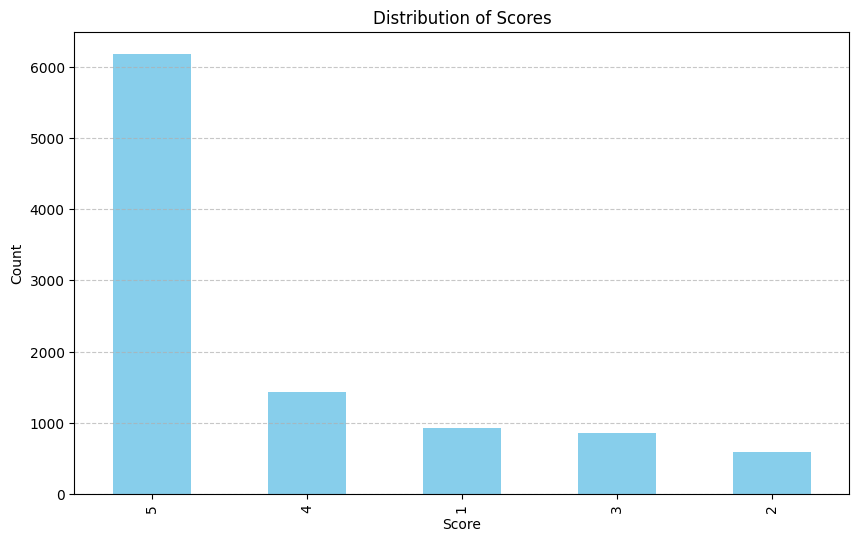

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data['Score'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Sentiment Distribution

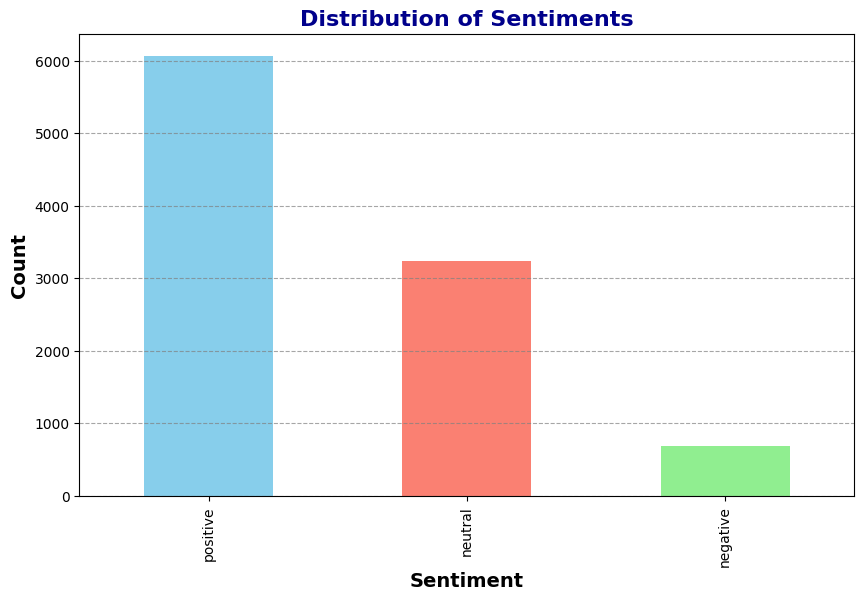

In [21]:
plt.figure(figsize=(10, 6))
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    
# Customizing the plot
plt.title('Distribution of Sentiments', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Sentiment', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.show()

WordCloud Generation

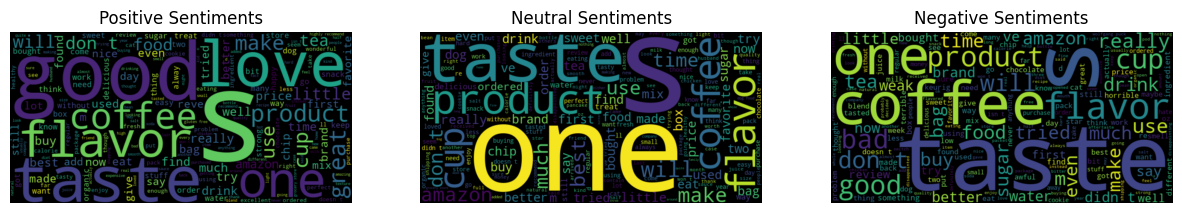

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data['Cleaned_Text'] = data['Cleaned_Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Separate Positive, Neutral, and Negative Sentiment Texts
positive_texts = ' '.join(data[data['Sentiment'] == 'positive']['Cleaned_Text'])
neutral_texts = ' '.join(data[data['Sentiment'] == 'neutral']['Cleaned_Text'])
negative_texts = ' '.join(data[data['Sentiment'] == 'negative']['Cleaned_Text'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)

# Display the word clouds
plt.figure(figsize=(15, 5))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiments')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

plt.show()
